# Follow the tutorial from 11.2 Neural network
Build and train a model to predict handwritten digits from mnist dataset

Great video [here](https://www.youtube.com/watch?v=5qCDzaOUCWA)

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


In [2]:
%matplotlib inline

5


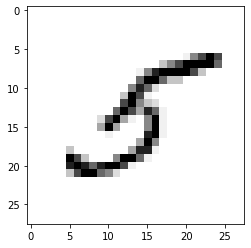

In [3]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(y_train[35])

5


In [6]:
# 
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (x_train_original, y_train_original), (x_test_original, y_test_original)
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0],image_size)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],image_size)
x_test = x_test.astype('float32')
x_test /= 255

x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
# test out the to_categorical method
print(to_categorical([0],10))
print(to_categorical([1],10))
print(to_categorical([2],10))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
from keras.models import Sequential
# model instance
model = Sequential()
# define each layer in the network
from keras.layers import Dense # the simplest layer type

input_layer = Dense(units=512,  # 512 units (nodes) is an arbitrary number (might be ajusted later up or down to see what gives most accuracy)
                activation='sigmoid', # activation is the activation function used to pass dot product of all inputs and weights through
                input_shape=(image_size, )) #28x28 for the mnist image size (must be an iterable, therefore the comma)

In [10]:
for i in (image_size,):
    print(i)
print(len((image_size,)))

784
1


In [11]:
# add hidden layer
model.add(input_layer)
# add another  hidden layer
model.add(Dense(units=512,activation='sigmoid'))

#model.add(Dense(units=48,activation='relu'))

# add an output layer
model.add(Dense(units=10, 
                activation='softmax', # softmax nonlinearity function for mapping the neural network activation to the categories
                #input_shape=(image_size,) # does not seem to be warranted
               ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Now train the model
model.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='sgd', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model.fit(x_train,
         y_train,
         epochs=5,
         verbose=True,
         validation_split=0.1) # checking periodically how well we are doing

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 74s 1ms/step - loss: 2.1562 - accuracy: 0.3238 - val_loss: 1.9226 - val_accuracy: 0.4993
Epoch 2/5
54000/54000 [==============================] - 71s 1ms/step - loss: 1.5141 - accuracy: 0.6547 - val_loss: 1.0805 - val_accuracy: 0.7635
Epoch 3/5
54000/54000 [==============================] - 72s 1ms/step - loss: 0.9048 - accuracy: 0.7845 - val_loss: 0.6783 - val_accuracy: 0.8502
Epoch 4/5
54000/54000 [==============================] - 72s 1ms/step - loss: 0.6564 - accuracy: 0.8296 - val_loss: 0.5126 - val_accuracy: 0.8783
Epoch 5/5
54000/54000 [==============================] - 53s 984us/step - loss: 0.5420 - accuracy: 0.8551 - val_loss: 0.4371 - val_accuracy: 0.8900


TypeError: Invalid shape () for image data

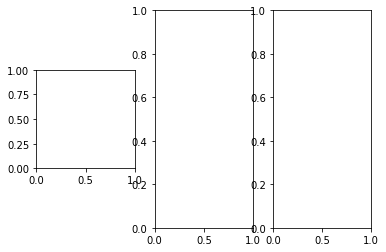

In [16]:
_, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(y_train_original[0], cmap='Greys')
ax2.imshow(y_train_original[1], cmap='Greys')
ax3.imshow(y_train_original[2], cmap='Greys')

In [17]:
results = model.evaluate(x_test, y_test)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
#print('predictions shape:', predictions.shape)
#print(predictions)
print('predict classes',model.predict_classes(x_test[:3]))

10000/10000 [==============================] - 7s 718us/step
test loss, test acc: [0.48697362561225893, 0.8668000102043152]

# Generate predictions for 3 samples
predict classes [7 2 1]


In [ ]:
from keras.utils import to_categorical
num_classes = 10
print(y_train.shape)
print('y_train first value',y_train[0])
# change the targets to one-hot-encoded
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[0])

## Documentation here
https://keras.io/getting-started/sequential-model-guide/

## using convolutional neural network for image classification with keras
https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/#what-are-convolutional-neural-networks

In [21]:
### more complex and more accurate model:


# reformat input
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test /= 255

#reformat output
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

from keras import models
from keras import layers
model2 = models.Sequential()
# keras.layers.Conv2D(filters, kernel_size... filter is how many filters (windows of sub pixel set) kernel is the window size eg: 3x3 pixels
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)))
model2.add(layers.MaxPool2D((2,2))) # Max Pooling to reduce the spatial dimensions of the output volume. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal)
model2.add(layers.Conv2D(64,(3,3),activation='relu')) # does not need input_shape, since it gets it from previous layer
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.Flatten()) # rewrite tensor to single vector of values
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # softmax is good for output layer because Softmax outputs probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [19]:
model2.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='rmsprop', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model2.fit(x_train,
         y_train,
         epochs=5,
         verbose=True,
         batch_size=64,
         validation_split=0.1) # checking periodically how well we are doing

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 160s 3ms/step - loss: 0.1853 - accuracy: 0.9422 - val_loss: 0.0712 - val_accuracy: 0.9795
Epoch 2/5
54000/54000 [==============================] - 167s 3ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 3/5
54000/54000 [==============================] - 176s 3ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0374 - val_accuracy: 0.9910
Epoch 4/5
54000/54000 [==============================] - 239s 4ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0400 - val_accuracy: 0.9890
Epoch 5/5
54000/54000 [==============================] - 239s 4ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0335 - val_accuracy: 0.9908


In [20]:
results = model2.evaluate(x_test, y_test)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model2.predict(x_test[:3])
#print('predictions shape:', predictions.shape)
print(predictions)
print('predict classes',model2.predict_classes(x_test[:3]))
print('actual:\n',y_test[:3])

10000/10000 [==============================] - 23s 2ms/step
test loss, test acc: [0.02740752196087815, 0.9919000267982483]

# Generate predictions for 3 samples
[[4.1825419e-12 7.1685019e-10 3.0779002e-09 2.8752992e-10 4.4118029e-15
  1.8686053e-12 4.5900087e-19 1.0000000e+00 1.5025502e-11 1.1632210e-09]
 [2.2818565e-06 2.2877171e-07 9.9999750e-01 7.2858718e-14 5.8374195e-12
  7.4479522e-16 4.5182702e-10 8.9414705e-11 3.9628526e-11 2.6583977e-15]
 [3.2460318e-10 9.9999583e-01 1.4702615e-08 6.5112038e-13 2.1133819e-06
  1.3829959e-09 4.5456988e-10 2.0050779e-06 9.8122275e-09 9.2092245e-10]]
predict classes [7 2 1]
actual:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
